<div style="font-weight: bold;font-size:40px">Introduction</div>

><div style="background-color: #F6FFF6;">
><ul style="font-size:16px;">
>    
><b>Problem Statement</b>
>
>Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.
>
> <b>Target is:</b>
>to perform clustering to summarize customer segments.


<center><img src="https://i.pinimg.com/564x/91/60/af/9160af85a18cab9f7b5e90a6b7d3a535.jpg" width=300></center>

    
<div style="font-weight: bold;font-size:30px">Data columns description</div>

><div style="background-color: #F6FFF6;">
><ul style="font-size:14px;">
>    
><br><b>People</b>
><br>- ID: Customer's unique identifier
><br>- Year_Birth: Customer's birth year
><br>- Education: Customer's education level
><br>- Marital_Status: Customer's marital status
><br>- Income: Customer's yearly household income
><br>- Kidhome, Teenhome: Number of children\teenagers in customer's household
><br>- Dt_Customer: Date of customer's enrollment with the company
><br>- Recency: Number of days since customer's last purchase
><br>- Complain: 1 if customer complained in the last 2 years, 0 otherwise
><br><b>Products</b>
><br>- MntWines, MntFruits : Amount spent on wine\fruits in last 2 years
><br>- MntMeatProducts, MntFishProducts: Amount spent on meat\fish in last 2 years
><br>- MntSweetProducts, MntGoldProds: Amount spent on sweets\gold in last 2 years
><br><b>Promotion</b>
><br>- NumDealsPurchases: Number of purchases made with a discount
><br>- AcceptedCmp1-5: 1 if customer accepted the offer in the 1st-5th campaign, 0 otherwise
><br>- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
><br><b>Place</b>
><br>- NumWebPurchases: Number of purchases made through the company’s web site
><br>- NumCatalogPurchases: Number of purchases made using a catalogue
><br>- NumStorePurchases: Number of purchases made directly in stores
><br>- NumWebVisitsMonth: Number of visits to company’s web site in the last month
</ul>
</div>

<br><div style="font-weight: bold;font-size:30px">Table of Contents</div>

>[Step 1: Examining Data](#section-two)
>    - [Basic information](#sub-21)
>    - [Data preproccessing](#sub-22)
>    - [Making additional columns](#sub-23)
>
>[Step 2: EDA](#section-three)
>    - [2.1 Research of  distributions](#sub-31)
>    - [2.2 Customer Personality](#sub-32)
>    
>[Step 3: Clustering](#section-four)  
>    - [3.1 Preprocessing and PCA](#sub-41)
>    - [3.2 Clustering](#sub-42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id="section-two"></a>
<div style="font-weight: bold;font-size:30px">Step 1: Examining Data</div>
<a id="sub-21"></a>


>
><div style="font-weight: bold;font-size:20px">1.1 Basic information</div>
>Importing libraries and reading data

In [ ]:
#Importing Requierd Libraries
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('seaborn-pastel')
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_palette("Greens_d")
# for Interactive Shells
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer

#removing warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import Birch
from sklearn.cluster import KMeans 
from sklearn import preprocessing
from sklearn.decomposition import PCA
import sklearn.cluster as cluster
import time

#secrets
#from kaggle_secrets import UserSecretsClient
#secret_label = "notebook_secret"
#secret_value = UserSecretsClient().get_secret(secret_label)

Examining "Marketing data"


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


There are 0 duplicates.


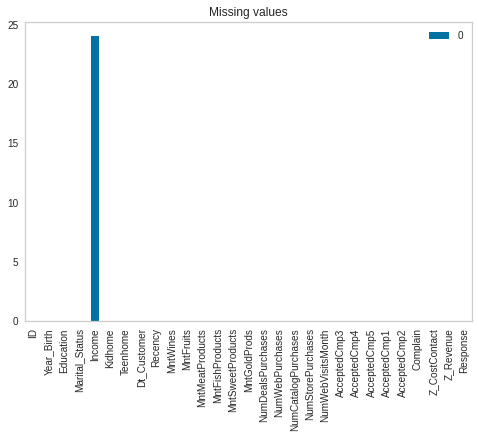

In [ ]:
#loading data
try:
    df = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv', sep='\t')
except:
    df = pd.read_csv('/marketing_campaign.csv', sep='\t')
    
#making a function for examining data
def data_research(data, data_name='data', un=False):
    #basic
    print(f'Examining "{data_name}"')
    display(data.head(2))
    #display(data.info())
    display(data.describe( include='all'))
    #display(data.columns)
    
    #duplicates
    duplicates = data.duplicated().sum()
    if duplicates > 0:
        print('There are no duplicated entries.')
    else:
        print(f'There are {duplicates} duplicates.')
        
    #missing
    data_missing = pd.DataFrame(round(data.isnull().sum()))
    if data_missing[0].sum() > 0:
        data_missing.plot(kind='bar')
        plt.grid()
        plt.title('Missing values');
    else:
        print(f'There are no missing values in "{data_name}".')
    
    #unique values
    if un == True:
        for i in data.columns:
            if data[i].dtype == 'object' or data[i].dtype == 'str':
                print(data[i].unique())
    
data_research(df, data_name='Marketing data')

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>At the first glance at the data: 
<br>- There are 2240 entries and 29 columns, one column is an customer's ID;
<br>- The columns 'z_costcontact','z_revenue' have zero std. All values are equal, we will drop this columns from the df.
<br>- No duplicated values and errors (at the first glance), only 'Income' column has missing values;
<br>- There are some columns, which datatypes are should be changed, for example 'object' to 'category'.<br>
At the next step we'll study and preprocess outliers, rename column names and change datatypes.
></ul>
></div>

<a id="sub-22"></a>
><div style="font-weight: bold;font-size:20px">1.2 Data preproccessing</div>
> Let's preprocces our data

In [ ]:
#adding one new column 
df["mspent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

# Renaming columns
df.columns = df.columns.str.lower()

numeric_columns_all = ['income', 'kidhome',
                   'teenhome', 'recency', 'mntwines', 'mntfruits',
                   'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
                   'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
                   'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
                   'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
                   'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response']

numeric_columns = ['income', 'kidhome',
                   'teenhome', 'recency', 'mntwines', 'mntfruits',
                   'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
                   'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
                   'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth']

bool_columns = ['acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
                   'acceptedcmp2', 'complain', 'response']

categorical_columns = ['education', 'marital_status']
data_columns = ['year_birth','dt_customer']

# changing data types and dropping columns
df['dt_customer'] = df['dt_customer'].astype(np.datetime64)
df['education'],df['marital_status'] = df['education'].astype('category'), df['marital_status'].astype('category')
df['year_month'] = df['dt_customer'].dt.strftime('%Y-%m')
df['mnt_products'] = df['mntwines'] + df['mntfruits'] + df['mntmeatproducts'] + df['mntfishproducts'] +\
                        df['mntsweetproducts'] + df['mntgoldprods']
df.drop(['z_costcontact', 'z_revenue'], axis=1, inplace=True)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2240 non-null   int64         
 1   year_birth           2240 non-null   int64         
 2   education            2240 non-null   category      
 3   marital_status       2240 non-null   category      
 4   income               2216 non-null   float64       
 5   kidhome              2240 non-null   int64         
 6   teenhome             2240 non-null   int64         
 7   dt_customer          2240 non-null   datetime64[ns]
 8   recency              2240 non-null   int64         
 9   mntwines             2240 non-null   int64         
 10  mntfruits            2240 non-null   int64         
 11  mntmeatproducts      2240 non-null   int64         
 12  mntfishproducts      2240 non-null   int64         
 13  mntsweetproducts     2240 non-nul

None

><br>Firstly, we've added the new column named 'mspent' (all expenses were summed),
><br>Secondly,all columns were changed to lower case,
><br>And then, we've changed some qualitative column's dtypes from 'object' to 'category'. 
>
>Also we have nan values in the 'income' column, the plan is:
>
>- Check correlation between values, define column correlated with 'income'
>- Fill nans with the use .groupby method and 'Education', column from the 1st step
>- Compare distributions before and after altering data

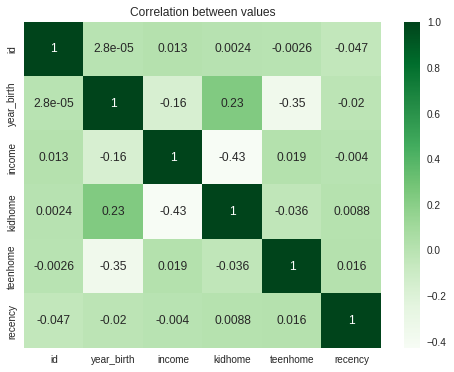

In [ ]:
# correlation between columns
fig = plt.figure(figsize=(8,6))
plt.title('Correlation between values')
sns.heatmap(df.iloc[:, :9].corr(), annot=True, cmap="Greens");

>It is interesting: we can see negative relation between Income and Kidhome, it can help us to fill nans in the first column. 

Skewness before filling nans 6.763
Skewness after filling nans 6.779


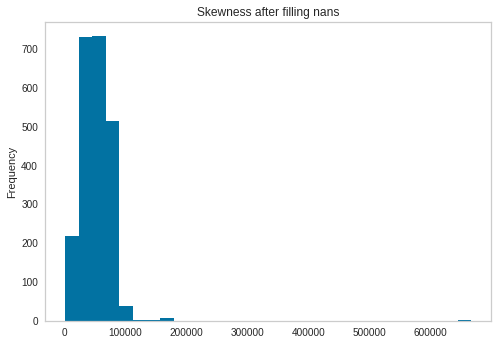

In [ ]:
#df.groupby('Education')['income'].mean()     # income by education group
#df.groupby('Kidhome')['income'].mean()     # income by Kidhome group
print('Skewness before filling nans', round(df['income'].skew(),3))

df["income"] = df["income"].fillna(df.groupby(['education','kidhome'])["income"].transform('mean')) #filling nans

df['income'].plot(kind='hist', bins=30)
plt.title('Skewness after filling nans')
plt.grid();
print('Skewness after filling nans', round(df['income'].skew(),3))

>There is almost no data distortion after filling nans, so lets go on!
>
>The next step is to check outliers in data and make filtered DataFreame if it's needed

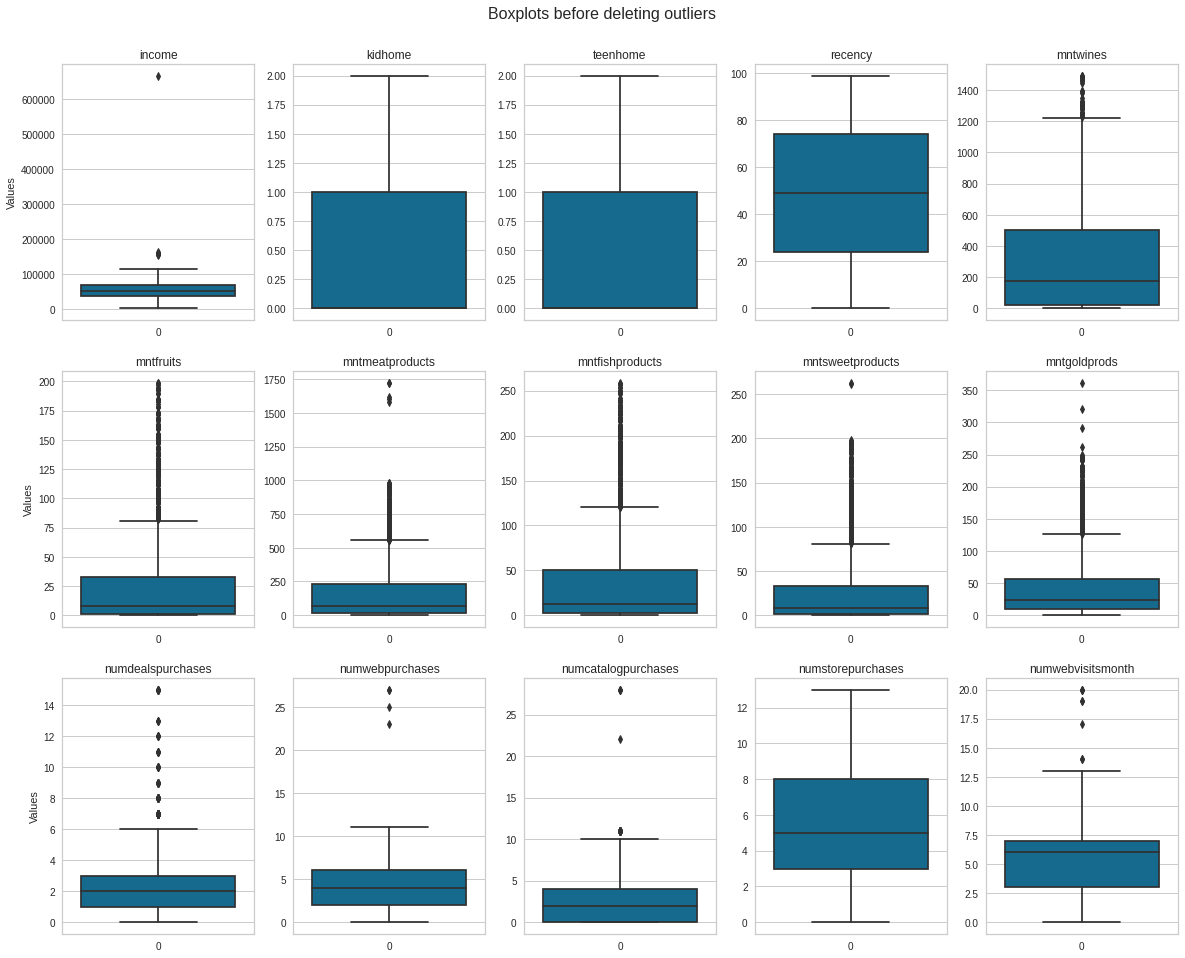

In [ ]:
# outliers
def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(20,16)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=3, cols=5, suptitle='Boxplots before deleting outliers')

>We have plotted boxplots for all columns, that are quantative, the columns 'kidhome', 'teenhome' are discret that is why it isn't reasonable to filter them.
>
>There are some outliers in 'income', columns about product purchases spend and kinds of purchases ('numdealspurchases' and etc.), it can be usefull to filter df.

In [ ]:
# deleting outliers
numeric_columns_to_filter = ['income', 'mntwines', 'mntfruits',
                   'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
                   'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
                   'numcatalogpurchases', 'numwebvisitsmonth']
Q1 = df[numeric_columns_to_filter].quantile(0.0)
Q3 = df[numeric_columns_to_filter].quantile(0.90)
IQR = Q3 - Q1
print('Here we will get IQR for each column\n',IQR)

df_filtered = df[~((df[numeric_columns_to_filter] < (Q1 - 1.5 * IQR)) |(df[numeric_columns_to_filter] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(df.shape)
display(df_filtered.shape)

Here we will get IQR for each column
 income                 78070.3
mntwines                 822.1
mntfruits                 83.0
mntmeatproducts          499.0
mntfishproducts          120.0
mntsweetproducts          89.0
mntgoldprods             122.0
numdealspurchases          5.0
numwebpurchases            8.0
numcatalogpurchases        7.0
numwebvisitsmonth          8.0
dtype: float64


(2240, 30)

(2223, 30)

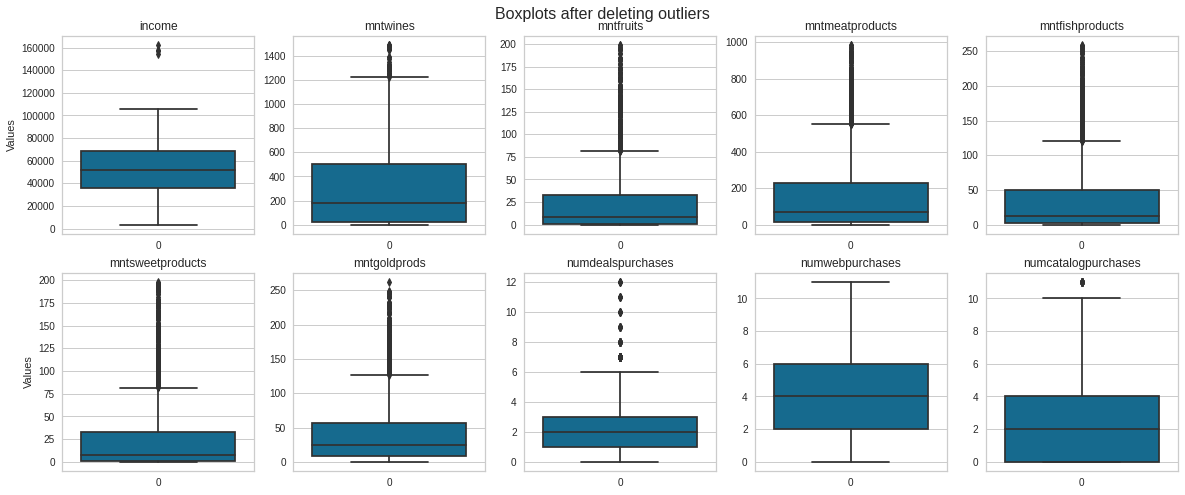

In [ ]:
boxplots_custom(dataset=df_filtered, columns_list=numeric_columns_to_filter[:-1], rows=2,
                cols=5, suptitle='Boxplots after deleting outliers',size=(20,8))

><div style="background-color: #F6FFF6;">
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
> To sum up:
<br>- We've plot the heatmap with correlation between all columns in order to fill nans in the 'Income' column. This didn't cause any change in data;
<br>- Outliers in data were investigated, there are lots of it in the 'Income', columns about money spent on products and purchases made. But nevertheless we see some outliers even in filtered data. We'll use filtered data further.
>
> At the next step we'll investigate some features closer.
></ul>
></div>

<a id="section-three"></a>
<div style="font-weight: bold;font-size:30px">Step 2: EDA</div>

<a id="sub-31"></a>
><div style="font-weight: bold;font-size:20px">2.1 Research of  distributions</div>
><div style="font-size:16px">
>A frequency distribution shows how often each different value in a set of data occurs. <b>It looks very much like a bar chart</b>, but they are not the same! <b>The major difference</b> is that a histogram is only used to plot the frequency of score occurrences in a continuous data set that has been divided into classes, called bins. Bar charts, on the other hand, can be used for a great deal of other types of variables including ordinal and nominal data sets.
>    
>Let's visualize hists for the each quantative column in our dataset ->
</div>

No handles with labels found to put in legend.
No handles with labels found to put in legend.


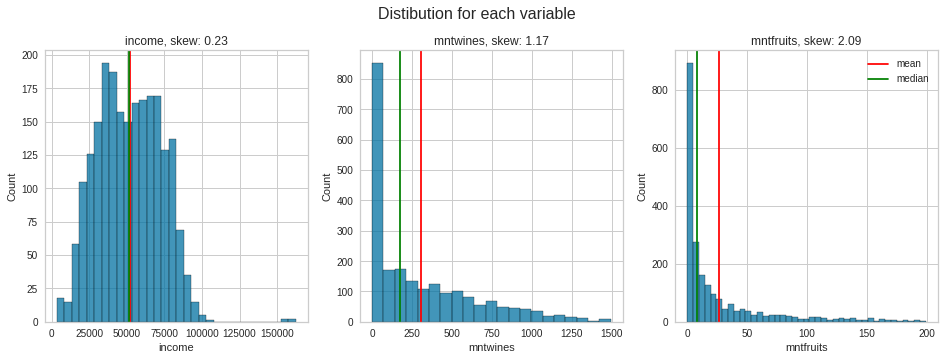

In [ ]:
# distributions
def dist_custom(dataset, columns_list, rows, cols, suptitle, size=(16,8), y=0.92):
    fig, axs = plt.subplots(rows, cols,figsize=size)
    fig.suptitle(suptitle,y=y, size=16)
    axs = axs.flatten() 
    for i, data in enumerate(columns_list):
        mean, median = dataset[data].mean(), dataset[data].median()
        graph = sns.histplot(dataset[data], ax=axs[i])
        graph.axvline(mean, c='red',label='mean')
        graph.axvline(median, c='green',label='median')
        plt.legend()
        axs[i].set_title(data + ', skew: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
dist_custom(dataset=df_filtered, columns_list=numeric_columns_to_filter[:3], 
            rows=1, cols=3, suptitle='Distibution for each variable', size=(16,5), y=1.0)

>We can see that the 'income' column has mean and almost simular median values unlike to 'mntwines' and 'mntfruits' values. This distribution has many peaks close together, the top of the distribution resembles a plateau. In average, income value is about 50 000, but some persons earn more.
Hist with 'mntwines' and 'mntfruits' data are Right-skewed.
>
>It seems like fruits are popular among customers, they spend a lot of money to it, as the hist is positive skewed and its value > 2, average value is higher than median (a lot of expensive purchases).
>
>Let's check another features ->

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


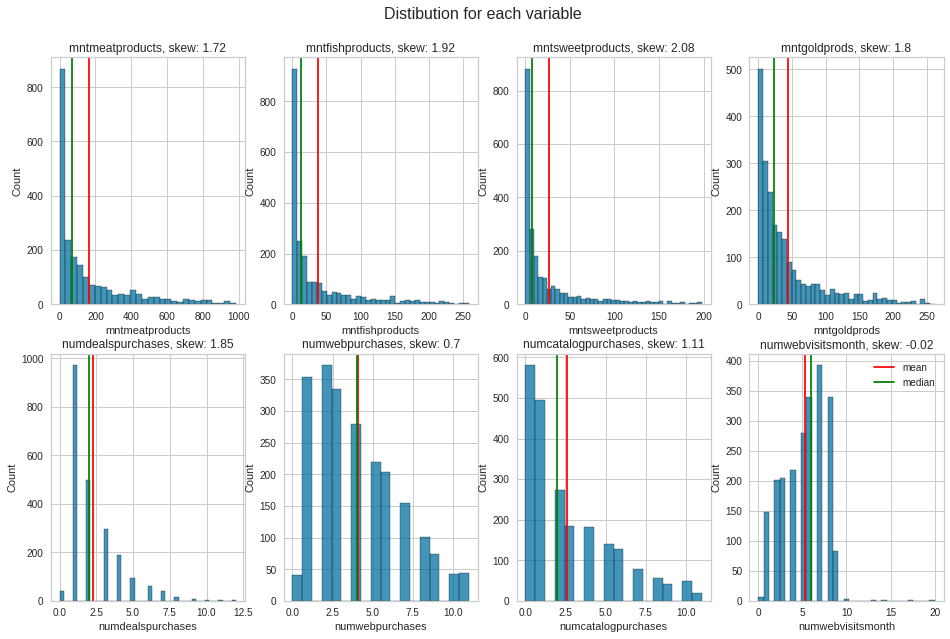

In [ ]:
dist_custom(dataset=df_filtered, columns_list=numeric_columns_to_filter[3:], 
            rows=2, cols=4, suptitle='Distibution for each variable', size=(16,10), y=0.95)

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations:</div>
><ul style="font-size:16px;">
<br>-  Most columns contain Right-skewed distribution except the last one; 
<br>-  We can very well tell from this graph that, the customers are more often buying on web than through a catalog and making deals; 
<br>-  The number of web visits is about 5 in average;
><br>
><br><b>Some questions for an additional investigation:</b>
<br>- Is there a correlation between the amount of money spent and number of visits?
<br>-  What is a dynamic of purchases and the amount of money spent?
<br>-  What is a relation between anount of customer's enrollment and purchases?   
<br>-  Who has the highest\lowest income?
    
></ul>
></div>

<a id="sub-32"></a>
><div style="font-weight: bold;font-size:20px">2.2 Customer Personality </div>
><div style="font-size:16px">
At this step we investigate the Income groups, answer the question 'What is a dynamic of purchases and the amount of money spent?' and find who spend the most.
</div>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-pa

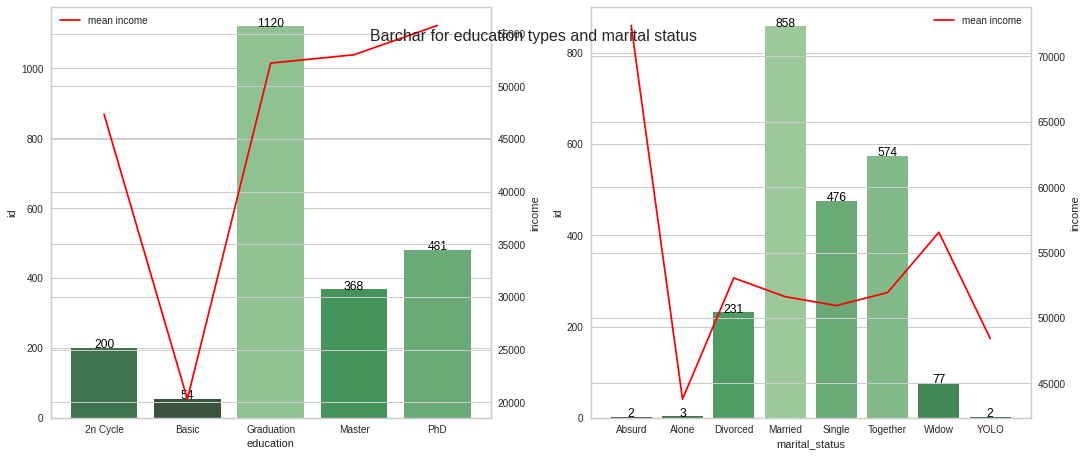

In [ ]:
def dist_custom(dataset, columns_list, rows, cols, suptitle, size=(16,8), y=0.92, inc=False):
    fig, axs = plt.subplots(rows, cols,figsize=size)
    fig.suptitle(suptitle,y=y, size=16)
    fig.tight_layout(pad=6.0)
    axs = axs.flatten() 
    
    for i, data in enumerate(columns_list):
        df_c = dataset.groupby(data).count().reset_index()
        pal = sns.color_palette("Greens_d", len(df_c))
        rank = df_c['id'].argsort().argsort() 
        
        g=sns.barplot(df_c[data], df_c['id'], ax=axs[i], palette=np.array(pal[::-1])[rank])
        plt.legend()
        for index, row in df_c.iterrows():
            g.text(row.name,row.id, round(row.id,2), color='black', ha="center")
            
        if inc == True:
            axs[i].tick_params(axis='y')
            df_c = dataset.groupby(data)['income'].mean().reset_index()
            axs[i] = axs[i].twinx()
            sns.lineplot(df_c[data], df_c['income'], ax=axs[i], color='red', label='mean income')
            axs[i].tick_params(axis='y')
        
        
dist_custom(dataset=df_filtered, columns_list=categorical_columns, 
            rows=1, cols=2, suptitle='Barchar for education types and marital status',
            size=(16,8), y=0.83, inc=True)

>From the plot above we can see that customers with Master and PhD degrees have the highest income in comparison to others education types. Clients with 'Basic' education don't earn a lot in average.
>
>Marital status barplot: customers with marital status "Absurd" has the highest income. Maybe it is erutliers in data, it should be investigated carefully. The lowest income reffers to alone people: it seems the reason is that such clients can be too young or too old and don't earn lots money.  
>
>YOLO is a popular online acronym that stands for: You Only Live Once. It was a surprise to meet it here! The additional link about this [acronym.](https://www.liveabout.com/definition-of-yolo-3486193)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misin

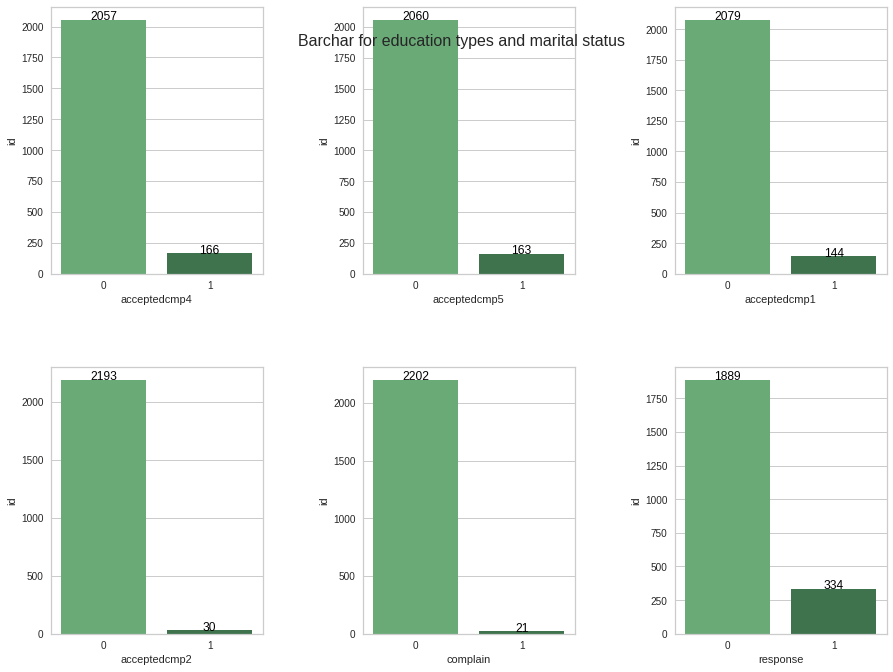

In [ ]:
# the data in acceptedcmp5 is equal to acceptedcmp3
dist_custom(dataset=df_filtered, columns_list=bool_columns[1:], 
            rows=2, cols=3, suptitle='Barchar for education types and marital status',
            size=(14,11), y=0.87, inc=False)

>There are not so many people who've complained - only 21, and a high amount of responsed offer customers.

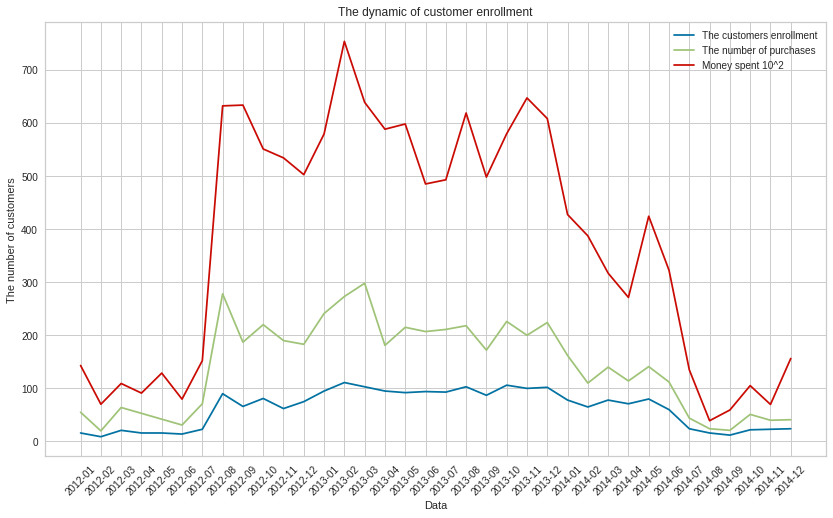

In [ ]:
fig = plt.figure(figsize=(14, 8))
sns.lineplot(data=df_filtered.groupby(df_filtered.year_month)['id'].nunique(),
             label='The customers enrollment', palette="r",markers=True, dashes=False)
sns.lineplot(data=df_filtered.groupby(df_filtered.year_month)['numdealspurchases'].sum(),
             label='The number of purchases', palette="flare")
sns.lineplot(data=df_filtered.groupby(df_filtered.year_month)['mnt_products'].sum() / 100,
             label='Money spent 10^2', palette="flare")
plt.title(label='The dynamic of customer enrollment')
plt.xlabel('Data'), plt.ylabel('The number of customers')
plt.legend()
plt.xticks(rotation=45)
plt.grid(b=True)
plt.show()

>From the plot above we can see a high rate of new clients enrollment with the company, that's why a great deal of money has been spent on products from August 2018 to May 2014. Most purchases were made in March 2013.
>
>Who those people who spent the most? Let's answer this question!

><div style="background-color: #F6FFF6;">
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>in the process
> 
></ul>
></div>

<a id="sub-33"></a>
><div style="font-weight: bold;font-size:20px">2.3 Ideal Customer</div>
>in the process


<a id="section-four"></a>
<div style="font-weight: bold;font-size:30px">Step 3: Clustering</div>

>
>Clustering is an unsupervised learning problem.
>In our data analysis project it is used as a technique for discovering groups of customers based on their behavior.
>
>There are many clustering algorithms to choose from and no single best clustering algorithm for all cases. Instead, it is a good idea to explore a range of >clustering algorithms and different configurations for each algorithm. 
><br>First of all, it is needed to prepare our data, let's do it ->

<a id="sub-41"></a>
><div style="font-weight: bold;font-size:20px">3.1 Preprocessing and PCA</div>
> Beforehand we have to prepare our data (again, yes!) to perform clustering.
><br><b>Step-by-Step (open the code cell to see it in detail):</b>
><br> <u>1. LabelEncoder()</u> to encode categorical columns with value between 0 and n_classes-1,
><br> <u>2. StandardScaler()</u> to standardize features by removing the mean and scaling to unit variance.
><br> <u>3. PCA()</u> to reduce feature dimentions to 3-5,
><br> <u>4. Elbow Method</u> to determine the number of clusters in a data set. 

In [ ]:
#1. Encoding categorical columns 
le = preprocessing.LabelEncoder()
df_c = df_filtered.copy() #keep a copy of data
categorical_columns.append('dt_customer')

for i in categorical_columns:
    df_c[i]=df_c[[i]].apply(le.fit_transform)
df_c.drop('id', axis=1, inplace=True)

#2. Scaling
cols_del = ['acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1','acceptedcmp2','year_month', 'complain', 'response']
df_c = df_c.drop(cols_del, axis=1)
scaler = StandardScaler()
scaler.fit(df_c)
df_s = pd.DataFrame(scaler.transform(df_c),columns= df_c.columns )

#3. Reducing dimentions to 3 with the PCA usage
pca = PCA(n_components=3)
pca.fit(df_s)
df_pca = pd.DataFrame(pca.transform(df_s), columns=(["f1","f2", "f3"]))
df_pca.describe().T
#print('Result table after perfoming encoding, scaling and PCA methods')
#df_pca.head()

print('The result after permorming steps from 1 to 3')

#Ploting result data with the use of scatterplot. plotly
x =df_pca["f1"]
y =df_pca["f2"]
z =df_pca["f3"]

fig = go.Figure(data=[go.Scatter3d(
    x=x,y=y,z=z,mode='markers',
    marker=dict(size=6,color=x,opacity=0.8))])

# tight layout
fig.update_layout( title={'text': "3D scatterplot of size-reduced data",'y':0.9,
        'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  margin=dict(l=200, r=220, b=0, t=0))
fig.show()
df_pca[:]
df_pca[:].to_csv(r'/File_Name.csv')

The result after permorming steps from 1 to 3


><b>Using the "elbow" or "knee of a curve"</b> as a cutoff point is a common heuristic in mathematical optimization to choose a point where diminishing returns are no longer worth the additional cost. In clustering, this means one should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.
>
><b>The KElbowVisualizer</b> implements the “elbow” method to help selecting the optimal number of clusters by fitting the model with a range of values for K. 
><br>If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. 
><br>In the visualizer “elbow” will be annotated with a dashed line.
>
> [See the documentation](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) to learn more about Elbow Method!

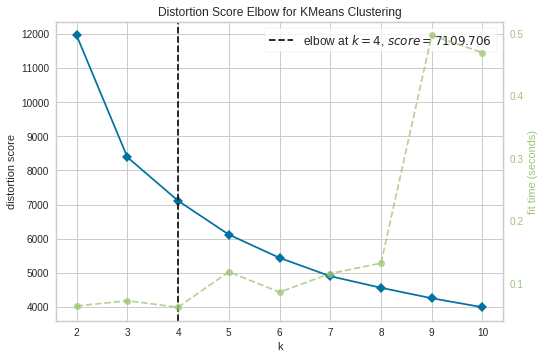

In [ ]:
# 4. Performing Elbow Method
plt_elb = KElbowVisualizer(KMeans(), k=10)
plt_elb.fit(df_pca)
plt_elb.show();

>So let’s have a closer look at the data and see what we have.

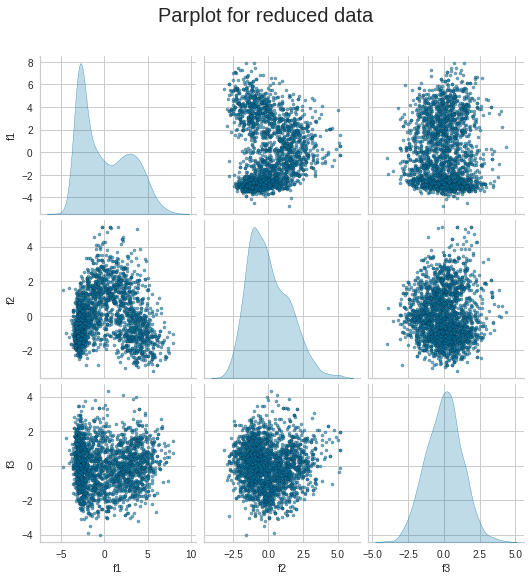

In [ ]:
g = sns.pairplot(df_pca, diag_kind="kde",
                 plot_kws = {'alpha': 0.6, 's': 10, 'edgecolor': 'k'})
g.fig.suptitle('Parplot for reduced data', 
             size = 20, y=1.07);

>It’s messy, but there are may occur some clusters that you cann't pick out by eye right away; determining the exact boundaries of those clusters is harder of course, but we can hope that our clustering algorithms will find at least some of those clusters👌
><br>So, on to testing 👀

<a id="sub-33"></a>
><div style="font-weight: bold;font-size:20px">3.2 Clustering  </div>
>
>
>Clustering techniques apply when there is no class to be predicted but rather when the instances are to be divided into natural groups.
><br>— Page 141, [Data Mining: Practical Machine Learning Tools and Techniques, 2016.](https://amzn.to/2R0G3uG)
>____________________________________
><b><br>Mean shift</b> is centroid based, like K-Means and affinity propagation, but can return clusters instead of a partition. The underlying idea of the Mean Shift algorithm is that there exists some probability density function from which the data is drawn, and tries to place centroids of clusters at the maxima of that density function. It approximates this via kernel density estimation techniques, and the key parameter is then the bandwidth of the kernel used. This is easier to guess than the number of clusters, but may require some staring at, say, the distributions of pairwise distances between data points to choose successfully. The other issue (at least with the sklearn implementation) is that it is fairly slow depsite potentially having good scaling!
>
><br><b>Affinity Propagation</b> is a newer clustering algorithm that uses a graph based approach to let points ‘vote’ on their preferred ‘exemplar’. The end result is a set of cluster ‘exemplars’ from which we derive clusters by essentially doing what K-Means does and assigning each point to the cluster of it’s nearest exemplar. Affinity Propagation has some advantages over K-Means. 
>
><b><br>K-Means</b> is fast, easy to understand, and available everywhere. K-Means has a few problems however. The first is that it isn’t a clustering algorithm, it is a partitioning algorithm. That is to say K-means doesn’t ‘find clusters’ it partitions your dataset into as many (assumed to be globular) chunks as you ask for by attempting to minimize intra-partition distances. That leads to the second problem: you need to specify exactly how many clusters you expect. The third problem is K-Means dependents upon initialization; give it multiple different random starts and you can get multiple different clusterings. This does not engender much confidence in any individual clustering that may result.
>
><b><br>Spectral Clustering</b> is fast, easy to understand, and available everywhere. K-Means has a few problems however. The first is that it isn’t a clustering algorithm, it is a partitioning algorithm. That is to say K-means doesn’t ‘find clusters’ it partitions your dataset into as many (assumed to be globular) chunks as you ask for by attempting to minimize intra-partition distances. That leads to the second problem: you need to specify exactly how many clusters you expect. The third problem is K-Means dependents upon initialization; give it multiple different random starts and you can get multiple different clusterings. This does not engender much confidence in any individual clustering that may result.
>
><b><br>Agglomerative Clustering</b> is really a suite of algorithms all based on the same idea. The fundamental idea is that you start with each point in it’s own cluster and then, for each cluster, use some criterion to choose another cluster to merge with. Do this repeatedly until you have only one cluster and you get get a hierarchy, or binary tree, of clusters branching down to the last layer which has a leaf for each point in the dataset. 
>
><br><b>DBSCAN</b> is a newer clustering algorithm that uses a graph based approach to let points ‘vote’ on their preferred ‘exemplar’. The end result is a set of cluster ‘exemplars’ from which we derive clusters by essentially doing what K-Means does and assigning each point to the cluster of it’s nearest exemplar. Affinity Propagation has some advantages over K-Means. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



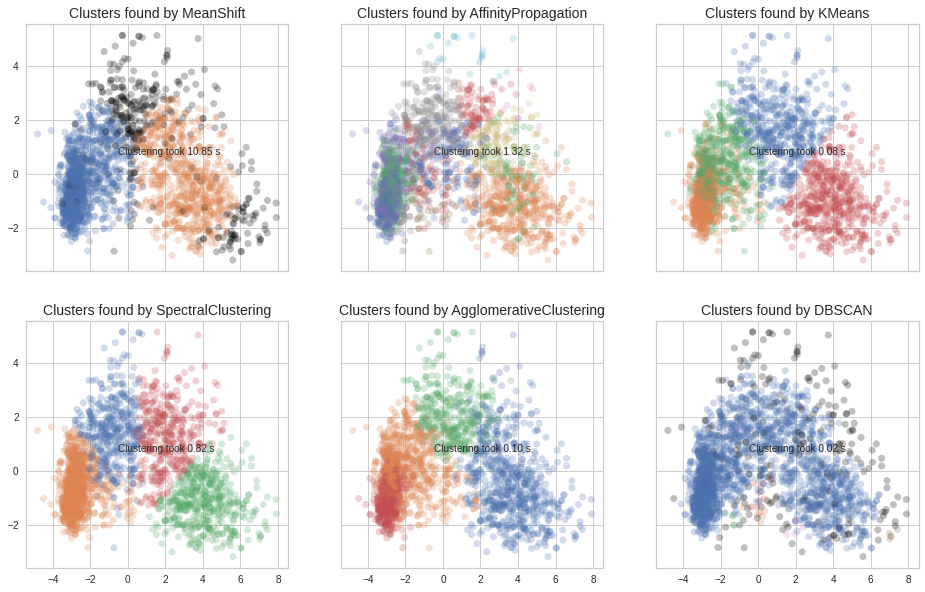

In [ ]:
plot_kwds = {'alpha' : 0.25, 's' : 50, 'linewidths':0}
clusters_series = []

def plot_clusters(data, algorithms, args, kwds, axs):
    for j, i in enumerate(axs):
        algorithm = algorithms[j]
        start_time = time.time()
        labels = algorithm( **kwds[j]).fit_predict(data)
        end_time = time.time()
        clusters_series.append(labels)
        #plotting
        palette = sns.color_palette('deep', np.unique(labels).max() + 1)
        colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]        
        i.scatter(data.iloc[:,0], data.iloc[:,1],c=colors,  **plot_kwds)
        i.set_title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=14)
        i.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=10)
    
    
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 10), sharex=True, sharey=True)
axs = axs.flatten()
data_alg = [cluster.MeanShift,cluster.AffinityPropagation , cluster.KMeans, 
           cluster.SpectralClustering, cluster.AgglomerativeClustering,cluster.DBSCAN]
data_arg = [(0.475,), (), (), 
           (), (), ()]
data_kwd = [{'cluster_all':False}, {'preference':-1.0, 'damping':0.95}, {'n_clusters':4},
           {'n_clusters':4}, {'n_clusters':4, 'linkage':'ward'}, {'eps':0.605}]

plot_clusters(data=df_pca, algorithms=data_alg, 
              args=data_arg, 
              kwds=data_kwd, axs=axs)

df_pca["clusters_affinity"], df_pca["clusters_spectral"] =  clusters_series[1],clusters_series[3]
df_pca["clusters_kmeans"], df_pca["clusters_agglom"] =   clusters_series[2],clusters_series[4]

df_filtered["clusters_affinity"], df_filtered["clusters_spectral"] =  clusters_series[1],clusters_series[3]
df_filtered["clusters_kmeans"], df_filtered["clusters_agglom"] =   clusters_series[2],clusters_series[4]

><b>We see some interesting results:</b>
><br> It is hard to determine some clusters due to high density, not all algorithms show reasonable results.
><br>Kmeans and Agglomerative Clustering show simular clusters, groupes found by Spectral Clustering differs (mostly, the 2d and 3d cluster). 
><br>To examine the clusters let's plot the 3D distribution of the clusters for spectral model as an example.

In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=x,y=y,z=z,mode='markers',
    marker=dict(size=6,color=df_pca["clusters_spectral"],colorscale='Viridis',opacity=0.8))])

# tight layout
fig.update_layout( title={'text': "3D scatterplot of spectral model clusters",'y':0.9,
        'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  margin=dict(l=200, r=220, b=0, t=0))
fig.show()

>
>

<a id="sub-44"></a>
><div style="font-weight: bold;font-size:20px">3.3 Comparing the results  </div>
>
>
>

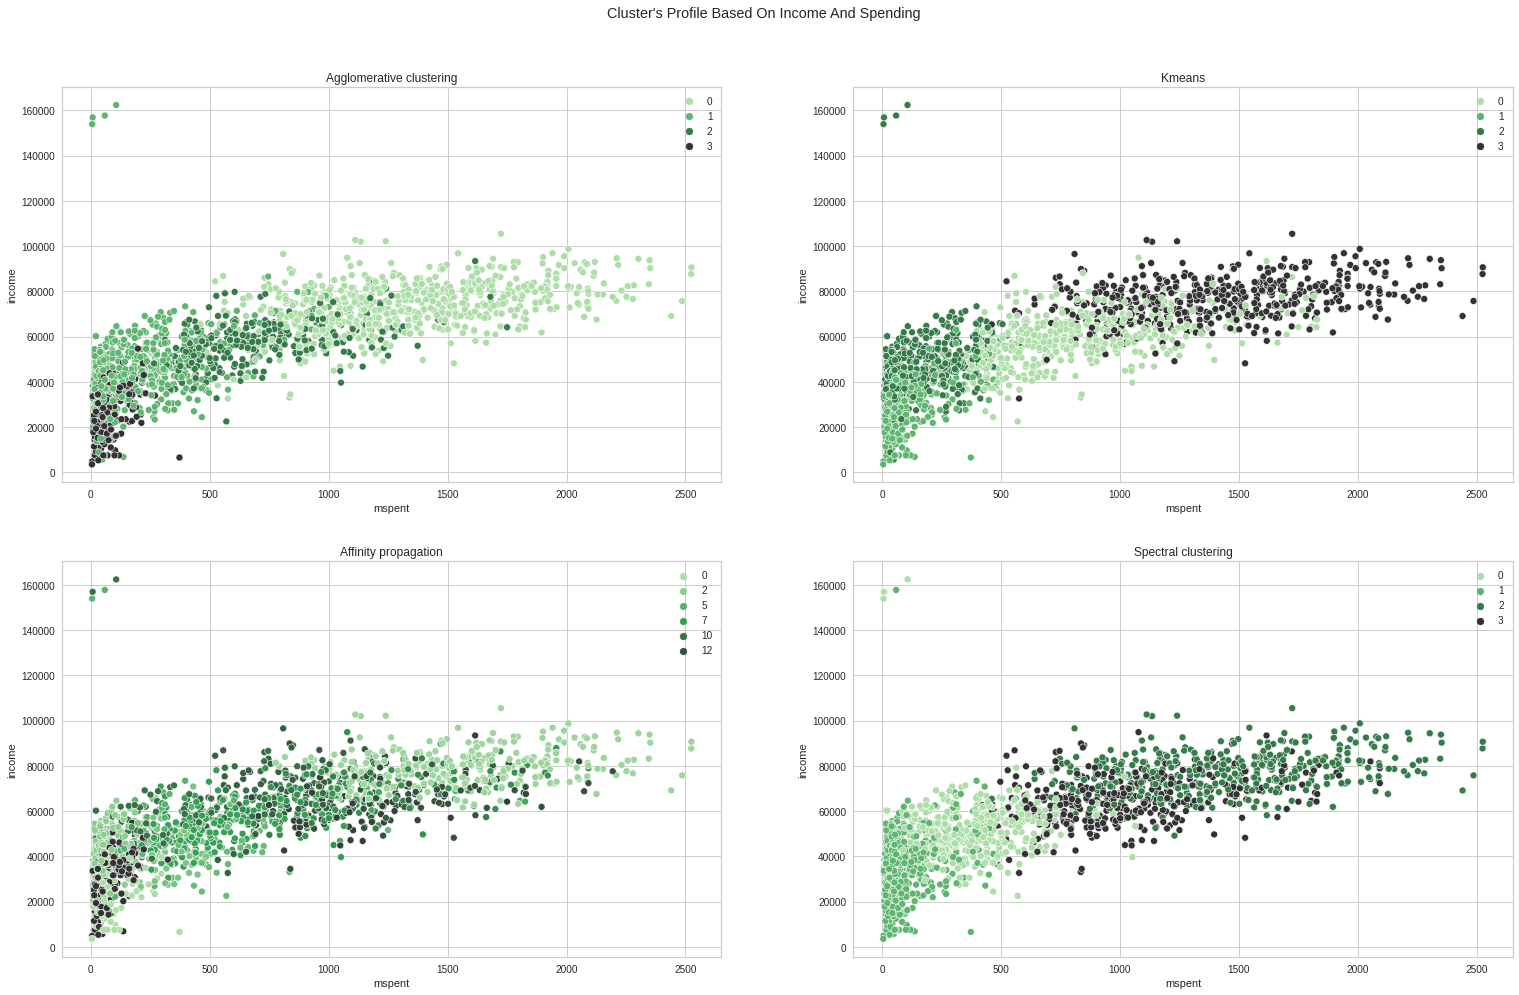

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(26,16))
ax = ax.flatten()
data, titles = ["clusters_agglom", "clusters_kmeans", "clusters_affinity","clusters_spectral"],["Agglomerative clustering", "Kmeans", "Affinity propagation","Spectral clustering"]

for j, i in enumerate(ax):
    sns.scatterplot(data = df_filtered,x=df_filtered["mspent"], y=df_filtered["income"],hue=df_filtered[data[j]], ax=i, palette="Greens_d")
    i.set_title(titles[j])
    i.legend()
    plt.suptitle("Cluster's Profile Based On Income And Spending", y=0.95);

<a id="section-five"></a>
<div style="font-weight: bold;font-size:30px"> Overall conclusion</div>